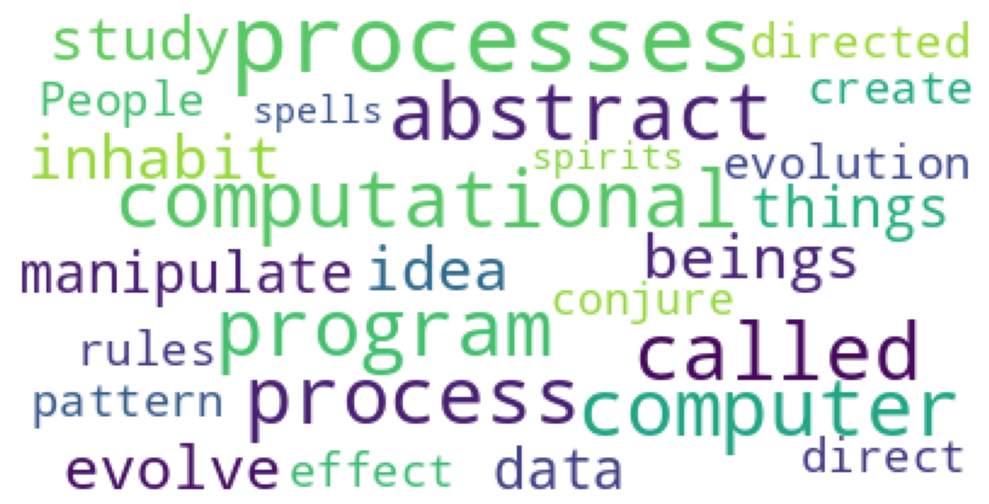

In [1]:
import re
import numpy as np
import string
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
sentences ="""We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(sentences)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.imshow(wordcloud)
axes.axis('off')
fig.tight_layout()

In [2]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

In [3]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()
print(sentences)

we are about to study the idea of computational process computational processes are abstract beings that inhabit computers as they evolve processes manipulate other abstract things called data the evolution of process is directed by pattern of rules called program people create programs to direct processes in effect we conjure the spirits of the computer with our spells


In [4]:
words = sentences.split()
vocab = set(words)
print(words)
print(vocab)

['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'computational', 'process', 'computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers', 'as', 'they', 'evolve', 'processes', 'manipulate', 'other', 'abstract', 'things', 'called', 'data', 'the', 'evolution', 'of', 'process', 'is', 'directed', 'by', 'pattern', 'of', 'rules', 'called', 'program', 'people', 'create', 'programs', 'to', 'direct', 'processes', 'in', 'effect', 'we', 'conjure', 'the', 'spirits', 'of', 'the', 'computer', 'with', 'our', 'spells']
{'people', 'by', 'computer', 'is', 'the', 'data', 'rules', 'program', 'directed', 'in', 'they', 'spells', 'evolve', 'abstract', 'called', 'of', 'process', 'with', 'study', 'things', 'create', 'evolution', 'other', 'computers', 'effect', 'about', 'processes', 'that', 'as', 'computational', 'pattern', 'to', 'direct', 'are', 'inhabit', 'beings', 'manipulate', 'conjure', 'programs', 'our', 'spirits', 'we', 'idea'}


In [5]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [6]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}
print(word_to_ix)
print(ix_to_word)

{'people': 0, 'by': 1, 'computer': 2, 'is': 3, 'the': 4, 'data': 5, 'rules': 6, 'program': 7, 'directed': 8, 'in': 9, 'they': 10, 'spells': 11, 'evolve': 12, 'abstract': 13, 'called': 14, 'of': 15, 'process': 16, 'with': 17, 'study': 18, 'things': 19, 'create': 20, 'evolution': 21, 'other': 22, 'computers': 23, 'effect': 24, 'about': 25, 'processes': 26, 'that': 27, 'as': 28, 'computational': 29, 'pattern': 30, 'to': 31, 'direct': 32, 'are': 33, 'inhabit': 34, 'beings': 35, 'manipulate': 36, 'conjure': 37, 'programs': 38, 'our': 39, 'spirits': 40, 'we': 41, 'idea': 42}
{0: 'people', 1: 'by', 2: 'computer', 3: 'is', 4: 'the', 5: 'data', 6: 'rules', 7: 'program', 8: 'directed', 9: 'in', 10: 'they', 11: 'spells', 12: 'evolve', 13: 'abstract', 14: 'called', 15: 'of', 16: 'process', 17: 'with', 18: 'study', 19: 'things', 20: 'create', 21: 'evolution', 22: 'other', 23: 'computers', 24: 'effect', 25: 'about', 26: 'processes', 27: 'that', 28: 'as', 29: 'computational', 30: 'pattern', 31: 'to',

In [7]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])


[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [8]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))
print(embeddings)

[[5.24246306e-01 4.59199540e-01 9.69420651e-01 8.57111406e-02
  8.07398535e-01 4.34527826e-01 3.64523920e-01 2.73990371e-01
  7.79753125e-01 5.22107305e-01]
 [2.62004680e-02 6.49244935e-01 7.30359300e-01 4.85366699e-01
  5.22229040e-02 7.20033336e-02 8.60076762e-01 9.79602551e-01
  6.26930305e-01 9.54104021e-01]
 [2.08535529e-01 5.55036447e-01 6.81073389e-02 3.98338422e-01
  9.07676516e-01 2.26895928e-01 5.38006283e-01 3.35316295e-02
  6.67894262e-01 7.18829852e-01]
 [9.49056872e-01 1.59296745e-01 6.47838635e-01 5.45596607e-01
  7.16201490e-01 8.06084315e-02 4.06792271e-01 6.68317510e-01
  3.03447564e-01 3.32886113e-02]
 [2.56811989e-01 7.41437983e-01 1.83045886e-01 2.04513578e-01
  6.73913553e-01 7.83596757e-01 7.17080093e-01 6.24321522e-03
  8.16952680e-01 2.66257160e-01]
 [9.07255025e-01 5.51246486e-01 4.19452165e-01 3.33090443e-01
  1.06766184e-01 3.51319261e-01 2.78055306e-01 3.59545756e-01
  3.66451550e-01 9.63429699e-01]
 [6.59978493e-01 4.59373683e-01 3.21988597e-01 3.46698272e

In [10]:
# -------------------------------
# Step 3: Generate training matrices
# -------------------------------

def make_one_hot(index, size):
    vec = np.zeros(size)
    vec[index] = 1
    return vec

X_train = []
Y_train = []

for context, target in data:
    context_indices = [word_to_ix[w] for w in context]
    target_index = word_to_ix[target]

    # context embeddings averaged (CBOW)
    X_train.append(np.mean([embeddings[i] for i in context_indices], axis=0))
    # one hot for target
    Y_train.append(make_one_hot(target_index, vocab_size))

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [11]:
# Step 4: Train CBOW Model
# -------------------------------

learning_rate = 0.01
epochs = 2000

for epoch in range(epochs):
    # forward pass
    y_pred = np.dot(X_train, embeddings.T)
    y_pred = np.exp(y_pred) / np.sum(np.exp(y_pred), axis=1, keepdims=True)

    # loss
    loss = -np.sum(Y_train * np.log(y_pred + 1e-9))

    # backward pass
    error = y_pred - Y_train
    grad = np.dot(error.T, X_train)
    embeddings -= learning_rate * grad

    if epoch % 400 == 0:
        print(f"Epoch {epoch} Loss: {loss}")

Epoch 0 Loss: 212.90005608783235
Epoch 400 Loss: 162.80197827850338
Epoch 800 Loss: 139.59311919797344
Epoch 1200 Loss: 121.91441599400059
Epoch 1600 Loss: 107.96540026209453


In [12]:
# Step 5: Check Similar Words
# -------------------------------

def similar_words(word):
    word_vec = embeddings[word_to_ix[word]]
    sims = {}
    for w in vocab:
        vec = embeddings[word_to_ix[w]]
        sim = np.dot(word_vec, vec) / (np.linalg.norm(word_vec) * np.linalg.norm(vec))
        sims[w] = sim
    return sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("\nWords similar to 'process':")
print(similar_words("process")[:10])


Words similar to 'process':
[('process', np.float64(0.9999999999999998)), ('by', np.float64(0.7007082092394666)), ('pattern', np.float64(0.5973919792887569)), ('computational', np.float64(0.5532400492100619)), ('evolve', np.float64(0.5237172415660972)), ('other', np.float64(0.34904772905214365)), ('they', np.float64(0.34766770709353384)), ('rules', np.float64(0.3096490082399519)), ('manipulate', np.float64(0.309157811223162)), ('is', np.float64(0.2517867175609671))]
